In [25]:
import os
import re
import random
import torch
from PIL import Image
import matplotlib.pyplot as plt


def visualize_training_progress(proj_dir, run_dir, only_image_num = None):
    logging_dir = '/scratch/users/austin.zane/ucsf_fast/logging/'
    image_dir = os.path.join(logging_dir, proj_dir, run_dir, 'segmentation_overlays')

    file_names = os.listdir(image_dir)
    image_groups = {}

    for file_name in file_names:
        match = re.match(r'epoch_(\d+)_batch_(\d+)_image_(\d+)\.(\w+)', file_name)
        if match:
            epoch, batch, image_num, extension = match.groups()
            if extension == 'png':  # Only consider files with .png extension
                if image_num not in image_groups:
                    image_groups[image_num] = []
                image_groups[image_num].append((int(epoch), int(batch), file_name))

    if len(image_groups) == 0:
        print('No images found')

    # Print file names in order by epoch and then by batch for each image
    for image_num, files in image_groups.items():
        if only_image_num is not None and image_num != str(only_image_num):
            continue
            
        print(f"#################\n#### Image {image_num} ####\n#################")
        files.sort()  # Sort files by epoch and then by batch

        for epoch, batch, file_name in files:
            # if epoch != 24:
            #     continue
            print(f'Epoch: {epoch}')
            print(f'File name: {file_name}')
            img = Image.open(os.path.join(image_dir, file_name))

            # Set the figure size (adjust width and height as needed)
            fig, ax = plt.subplots(figsize=(12, 4))

            ax.imshow(img)
            ax.axis('off')
            plt.show()

        print()

In [ ]:
# Most recent high-epoch run was 'unet_test_05_16_24', 'toasty-spaceship-1-pwu9tjqm'

#################
#### Image 3 ####
#################
Epoch: 0
File name: epoch_0_batch_53_image_3.png


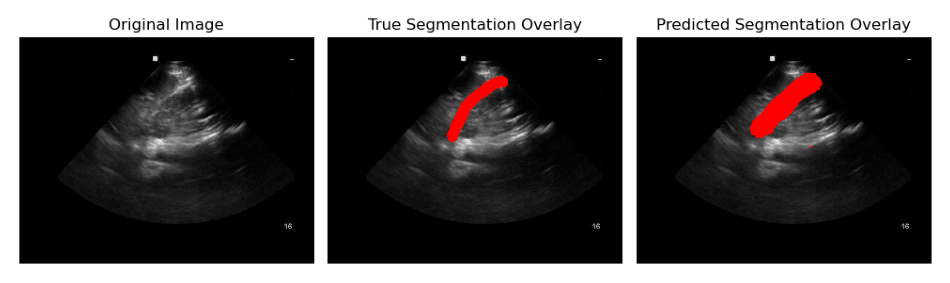

Epoch: 1
File name: epoch_1_batch_53_image_3.png


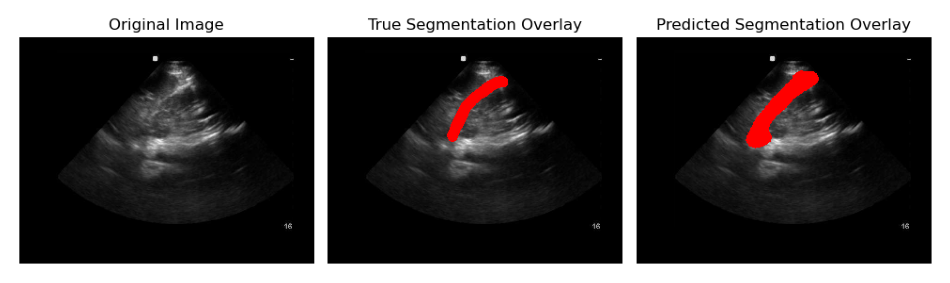

In [33]:
visualize_training_progress('unet_test_05_18_24', 'smart-vortex-6-2ew1egmv', 3)

In [13]:
proj_dir = '05_04_2024_ucsf_fast_test'
run_dir = 'mythical-podracer-8'
logging_dir = '/scratch/users/austin.zane/ucsf_fast/logging/'
image_dir = os.path.join(logging_dir, proj_dir, run_dir, 'segmentation_overlays')

file_names = os.listdir(image_dir)
image_groups = {}

for file_name in file_names:
    match = re.match(r'epoch_(\d+)_batch_(\d+)_image_(\d+)\.(\w+)', file_name)
    if match:
        epoch, batch, image_num, extension = match.groups()
        if extension == 'png':  # Only consider files with .png extension
            if image_num not in image_groups:
                image_groups[image_num] = []
            image_groups[image_num].append((int(epoch), int(batch), file_name))

if len(image_groups) == 0:
    print('No images found')

# Print file names in order by epoch and then by batch for each image
for image_num, files in image_groups.items():
    print(f"#################\n#### Image {image_num} ####\n#################")
    files.sort()  # Sort files by epoch and then by batch
    
    for epoch, batch, file_name in files:
        # if epoch != 24:
        #     continue
        print(f'Epoch: {epoch}')
        print(f'File name: {file_name}')
        img = Image.open(os.path.join(image_dir, file_name))
        
        # Set the figure size (adjust width and height as needed)
        fig, ax = plt.subplots(figsize=(12, 4))
        
        ax.imshow(img)
        ax.axis('off')
        plt.show()
    
    print()

No images found


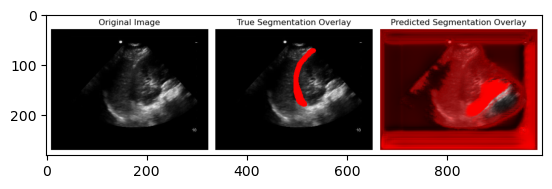

In [6]:
img = Image.open(os.path.join(image_dir, 'epoch_4_batch_52_image_0.png'))
plt.imshow(img)
plt.show()

## Randomly select images to visualize for the proposal

In [43]:
raw_image_dir = '/scratch/users/austin.zane/ucsf_fast/data/pilot_labeling/AnnotationData/MorisonPouchMasks_1-23'

raw_image_names = [f for f in os.listdir(raw_image_dir) if not '_Morison' in f and f.endswith('.png')]


In [48]:
raw_image_choice = random.sample(raw_image_names, 2)

In [49]:
raw_image_choice

['A_EM61ro_0.png', 'A_gkvD8D_149.png']

# Verify that annotation and image processing was successful

Verfying correctness of `/accounts/campus/austin.zane/ucsf_fast/notebooks/accessing_mdai_data.py`

If masks and images match, we are good to go.

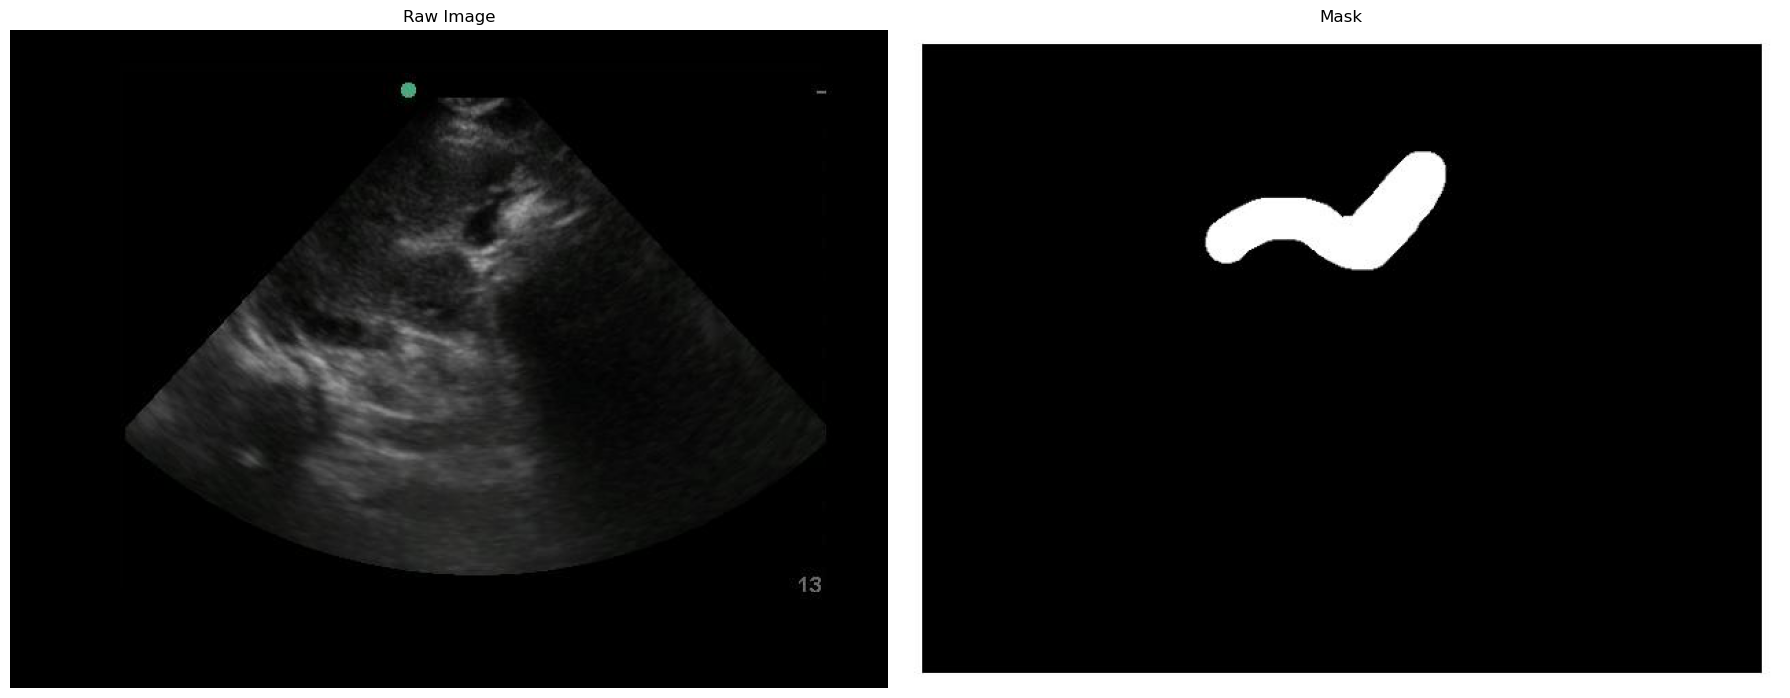

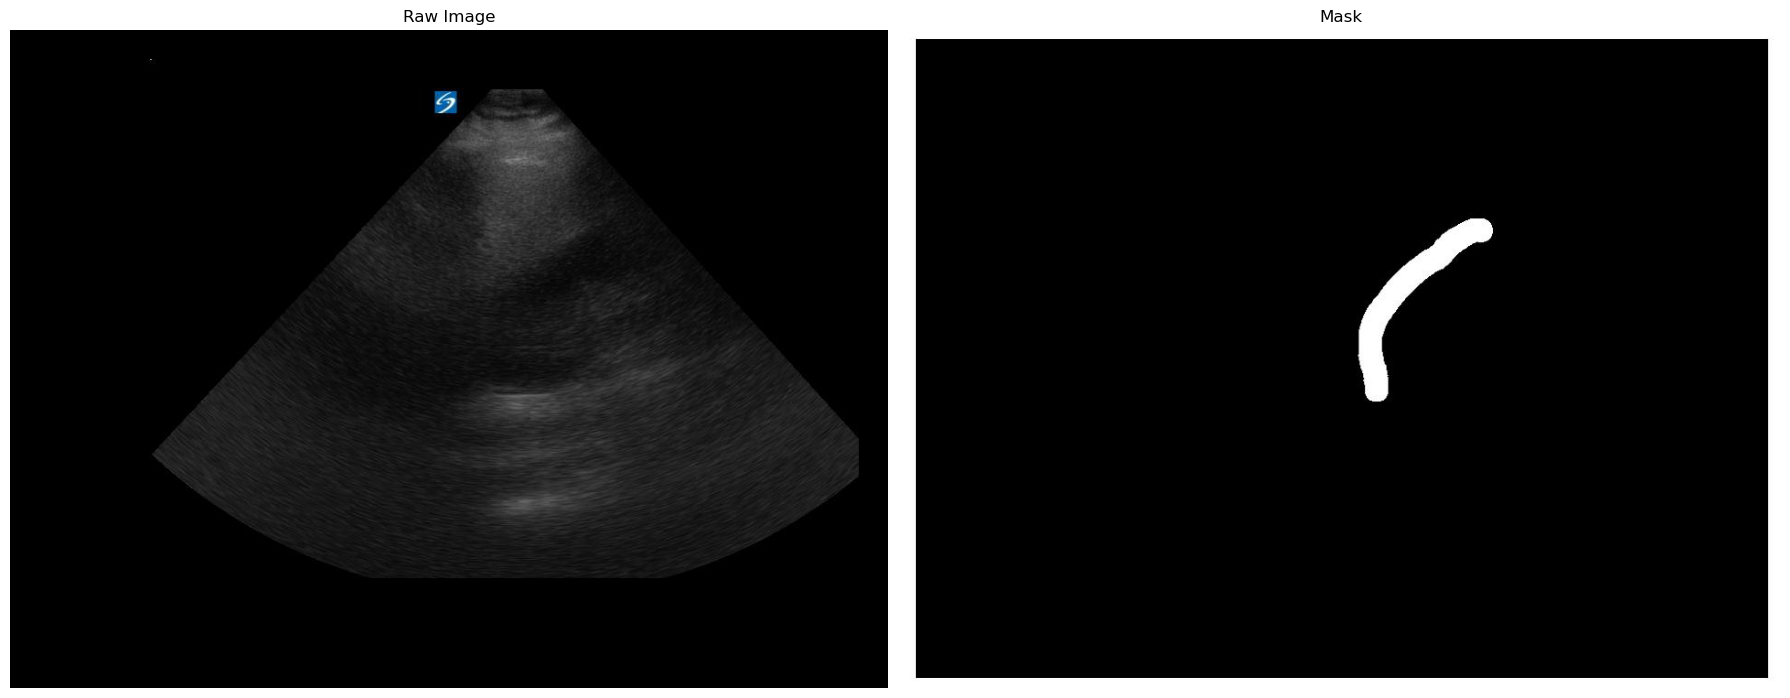

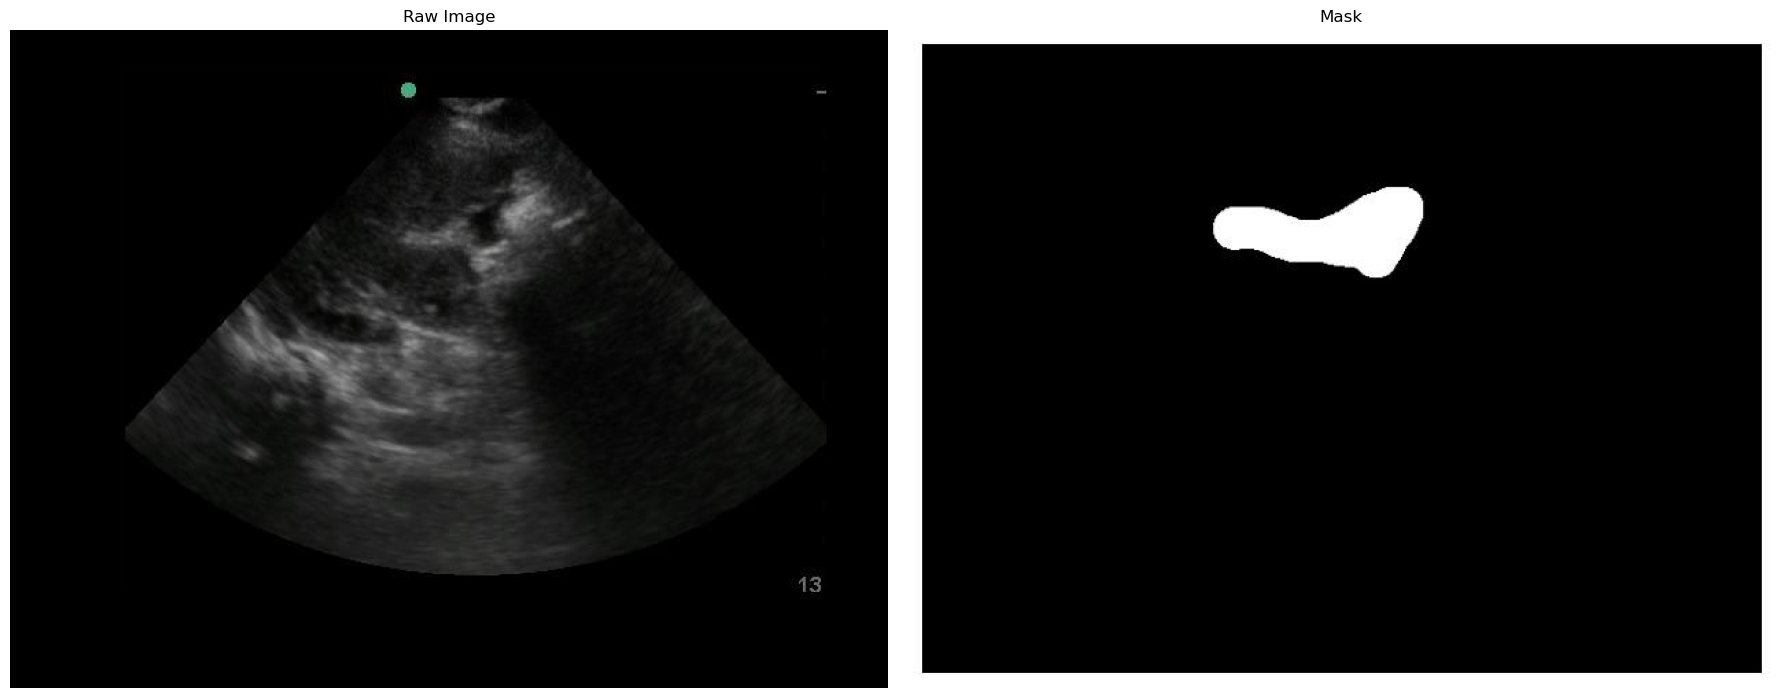

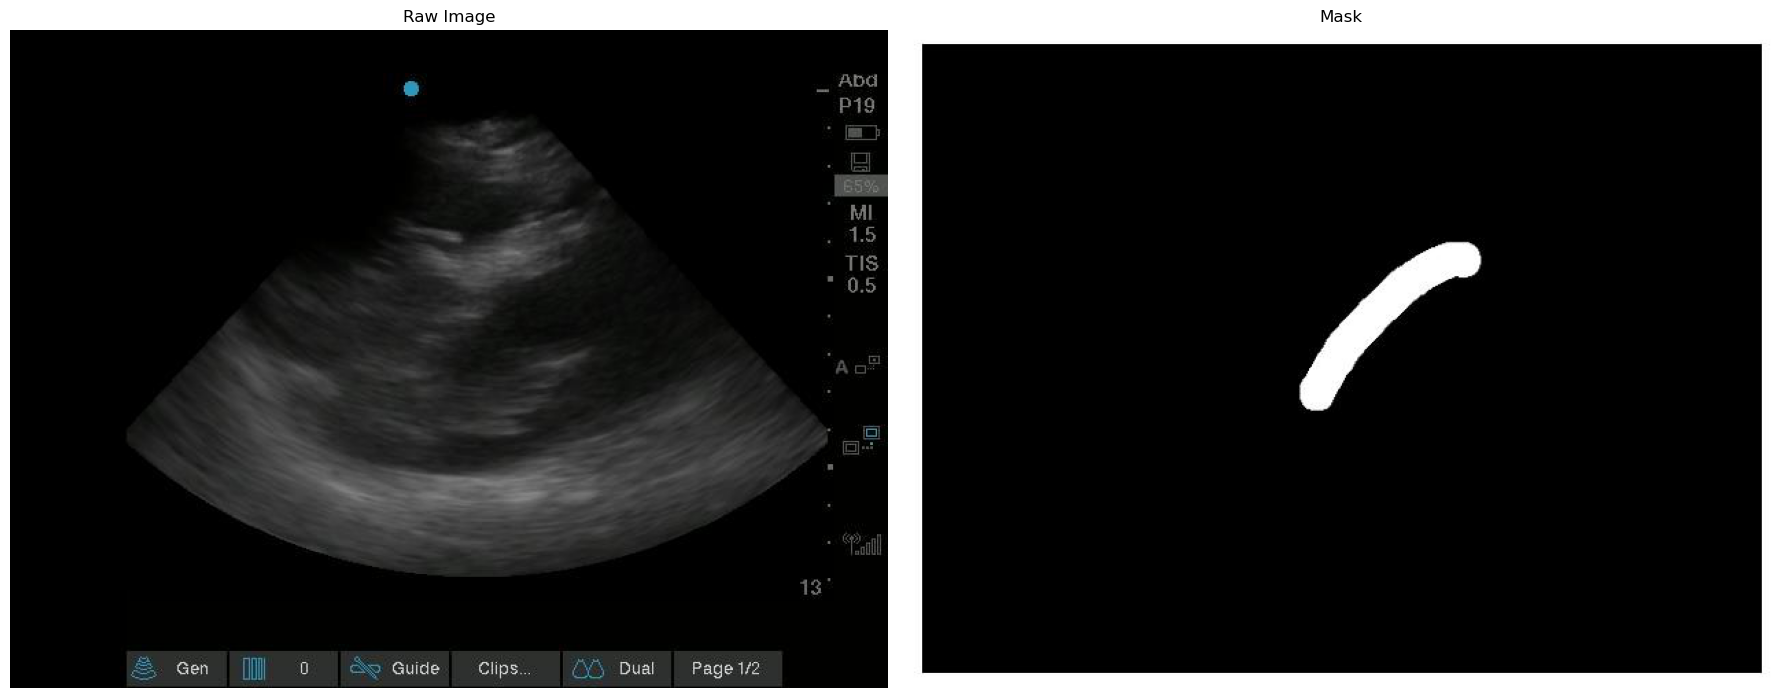

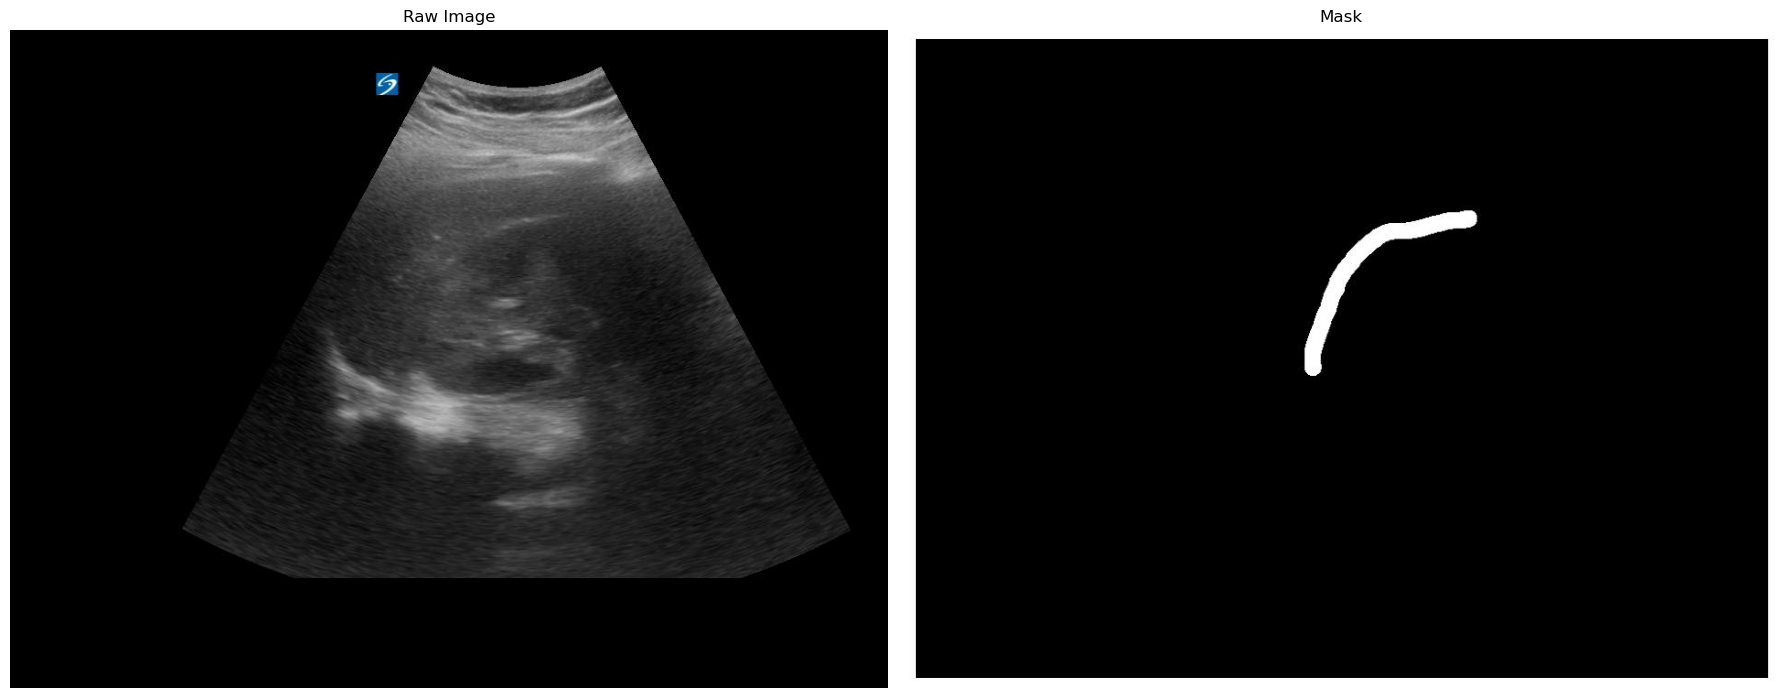

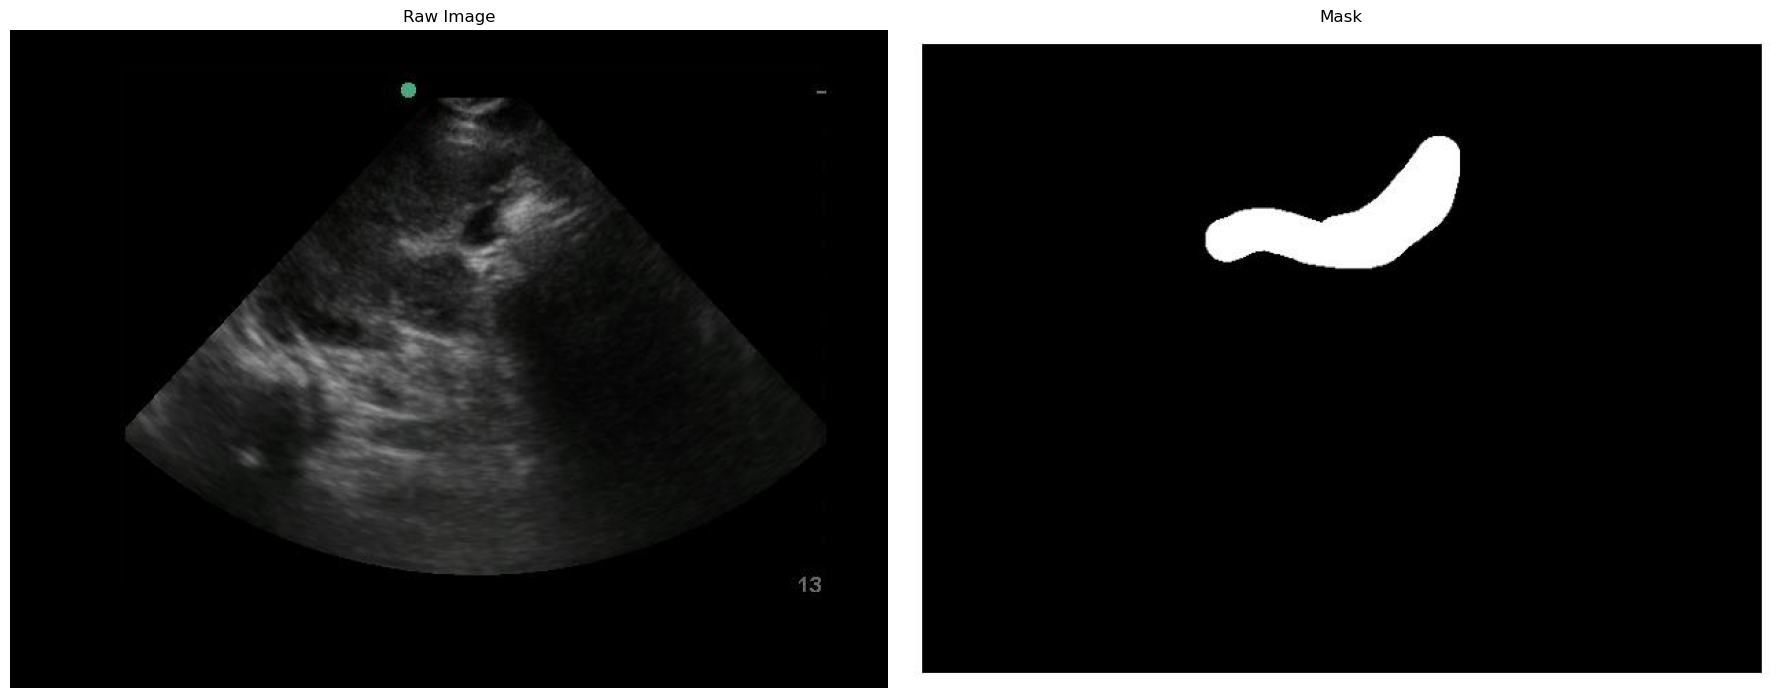

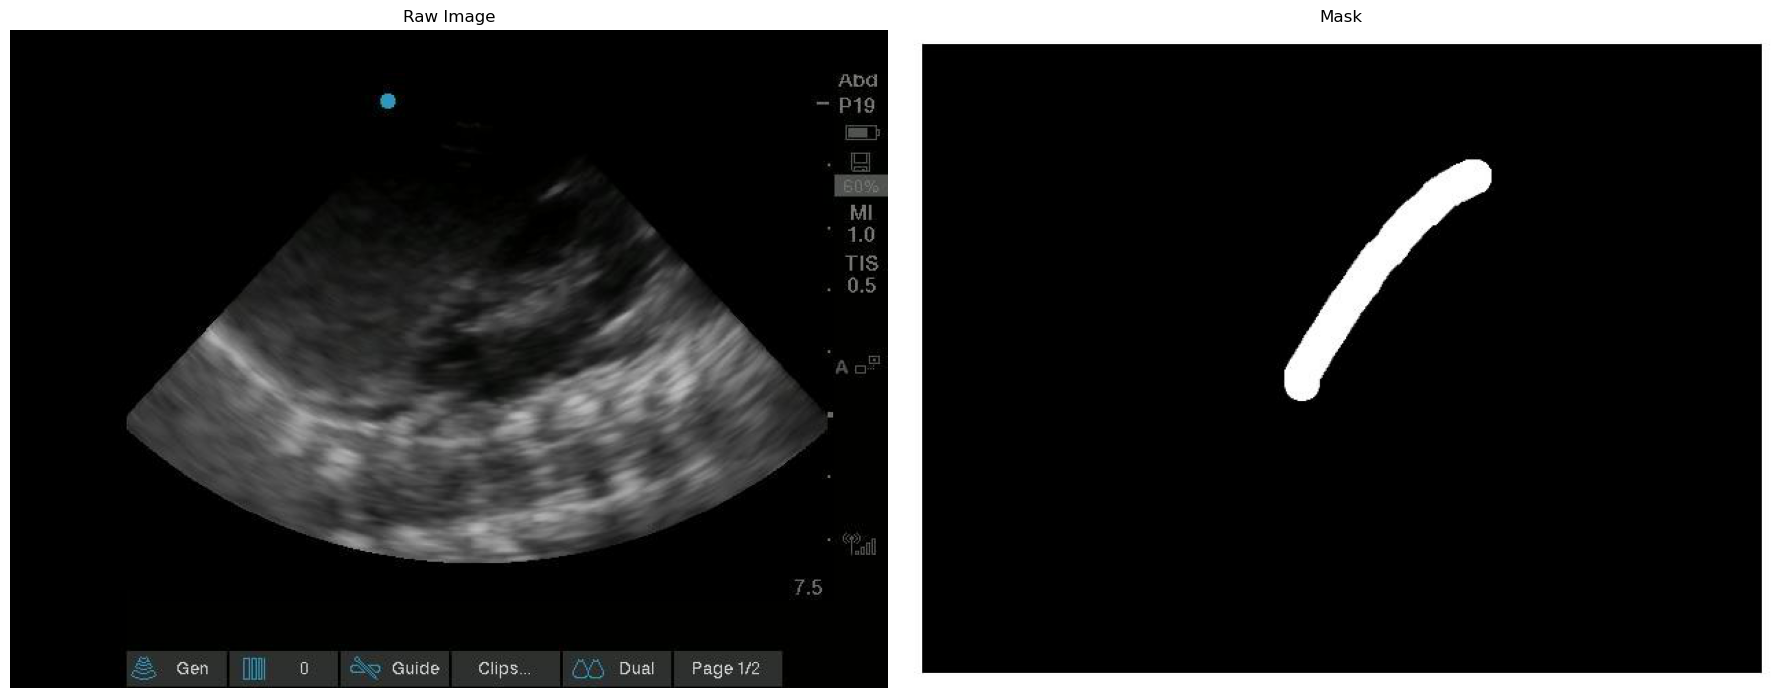

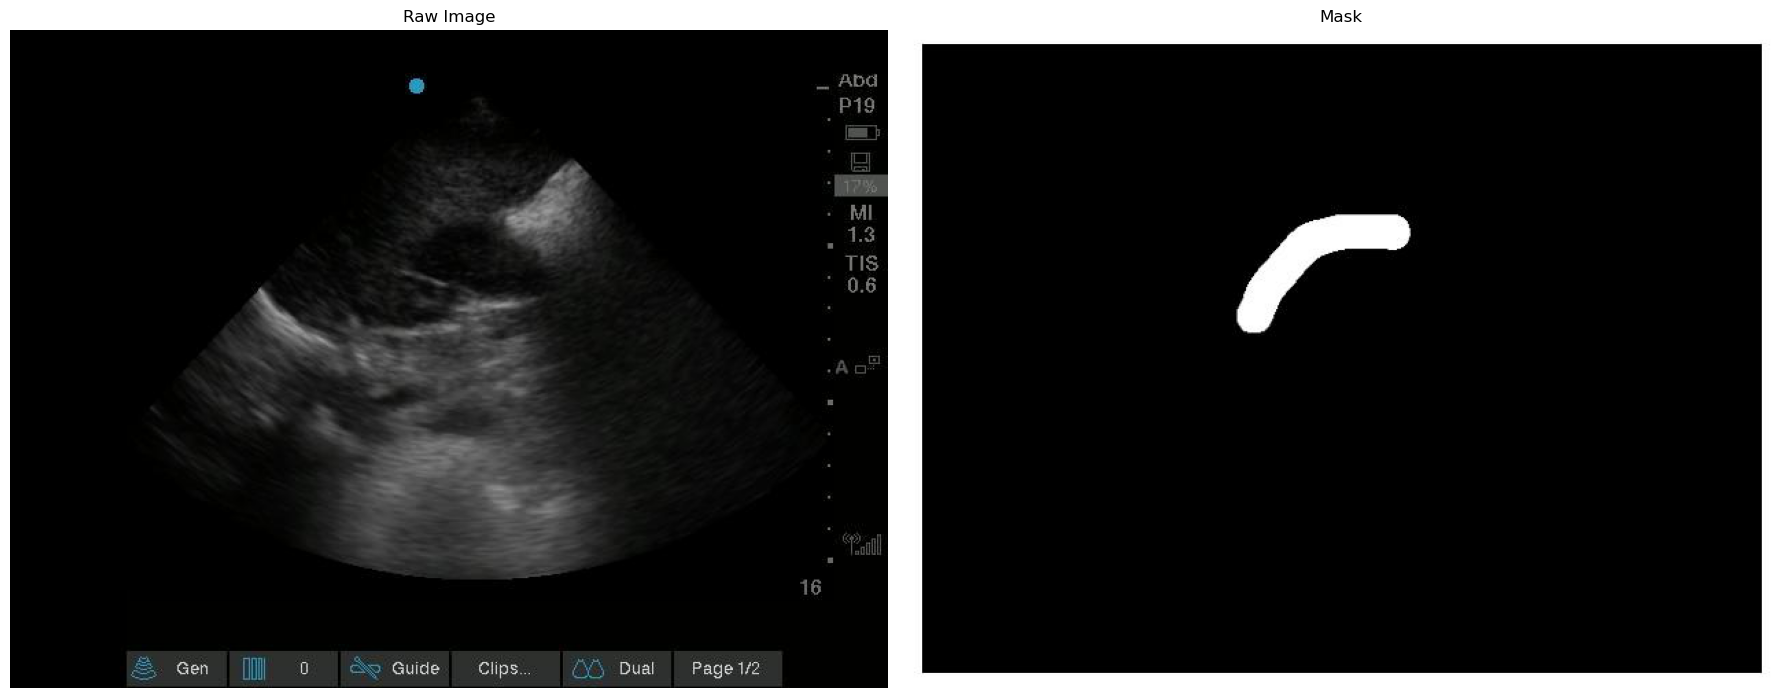

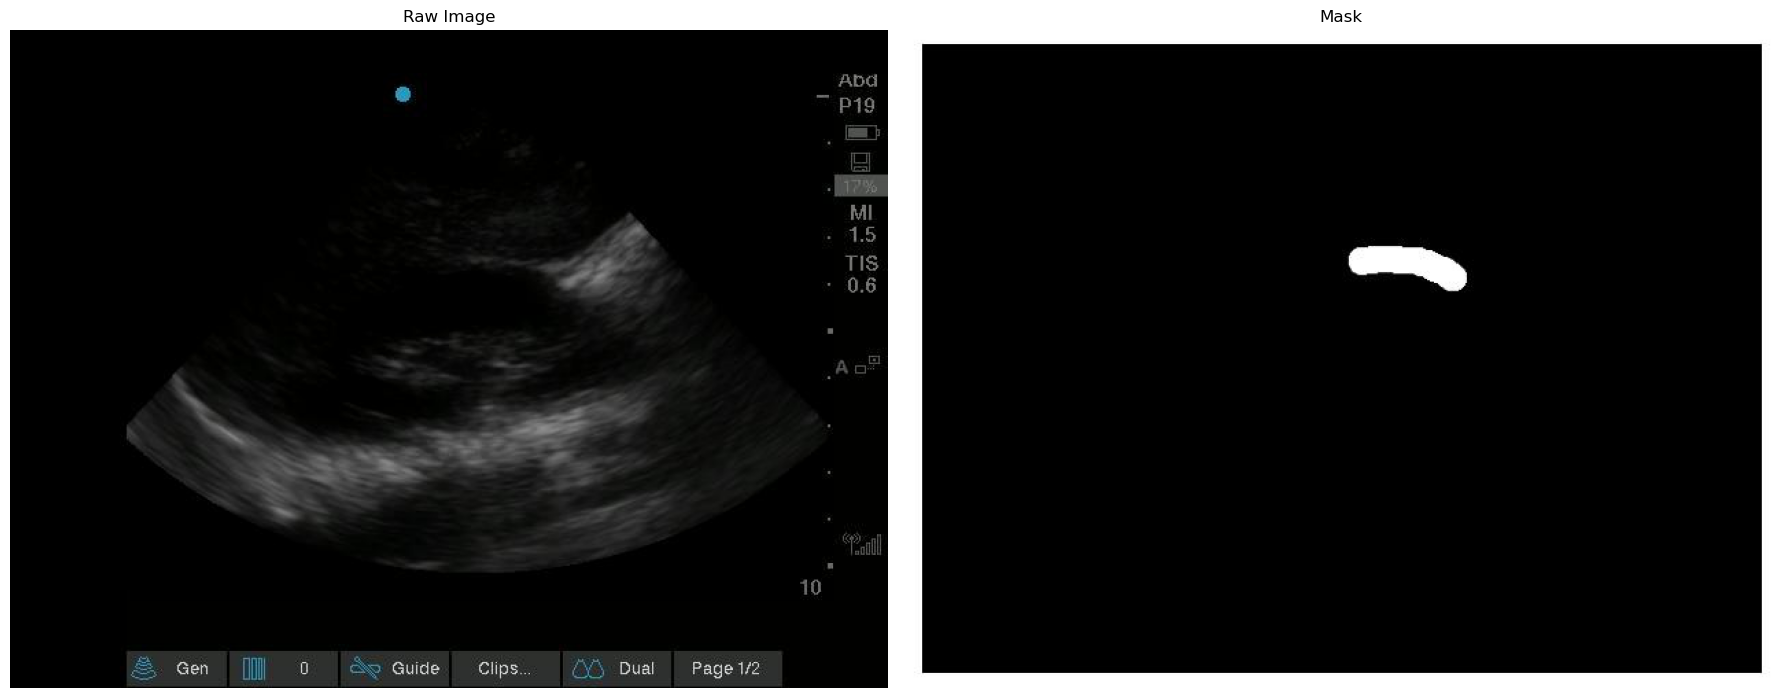

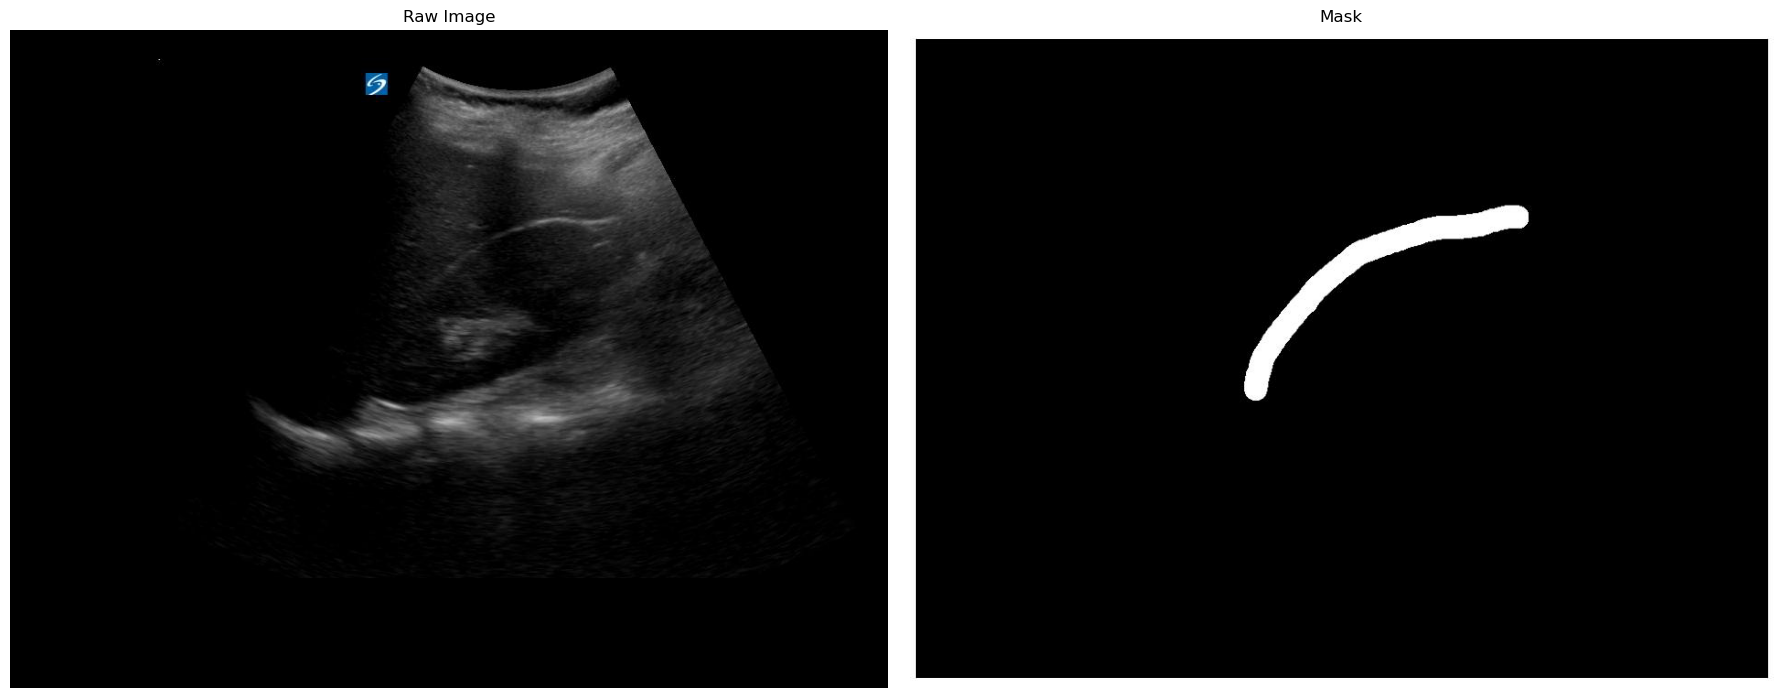

In [8]:
raw_image_dir = '/scratch/users/austin.zane/ucsf_fast/data/labeled_fast_morison/raw_images'
mask_dir = '/scratch/users/austin.zane/ucsf_fast/data/labeled_fast_morison/masks'

mask_file_names = os.listdir(mask_dir)
mask_file_names_sampled = random.sample(mask_file_names, 10)

raw_image_file_names = [x.split('_Mask')[0] + '.jpg' for x in mask_file_names_sampled]

for mask_fname in mask_file_names_sampled:
    raw_img_fname = mask_fname.split('_Mask')[0] + '.jpg'
    
    mask_img = Image.open(os.path.join(mask_dir, mask_fname))
    raw_img = Image.open(os.path.join(raw_image_dir, raw_img_fname))
        
    # Set the figure size (adjust width and height as needed)
    fig, ax = plt.subplots(1, 2, figsize=(18, 9))
    
    # Display the raw image
    ax[0].imshow(raw_img, cmap='gray')
    ax[0].set_title('Raw Image')
    ax[0].axis('off')
    
    # Display the mask image
    ax[1].imshow(mask_img, cmap='gray')
    ax[1].set_title('Mask')
    ax[1].axis('off')
    
    plt.tight_layout()
    plt.show()
    

# Visualizing right before feeding into model

This is a visualization of the raw_images, masks, and free fluid labels just before they are fed into the model in the training loop.

In [9]:
batch_data = torch.load('/scratch/users/austin.zane/ucsf_fast/data/labeled_fast_morison/debugging/training_loop_data_check.pth')
batch_images = batch_data['images']
batch_masks = batch_data['masks']
batch_labels = batch_data['free_fluid_labels']

Convert the image files to something that can be visualized.

Image shape: torch.Size([1, 736, 960])
Mask shape: torch.Size([1, 736, 960])
FF label: 1


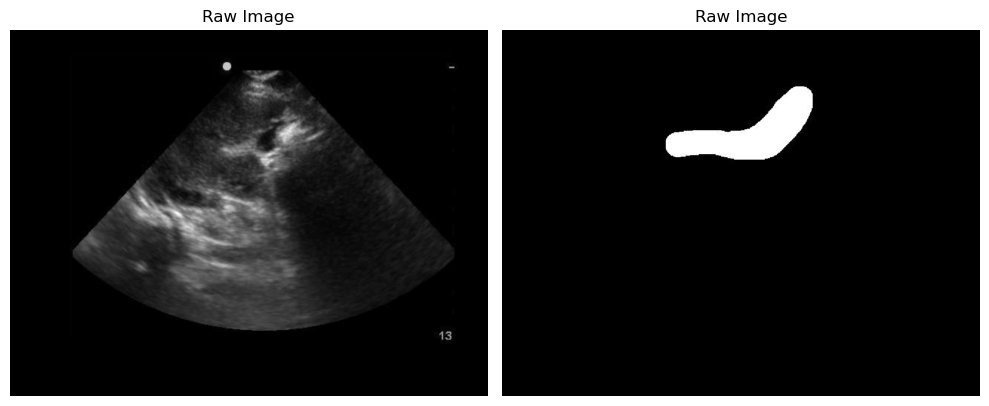

Image shape: torch.Size([1, 736, 960])
Mask shape: torch.Size([1, 736, 960])
FF label: -1


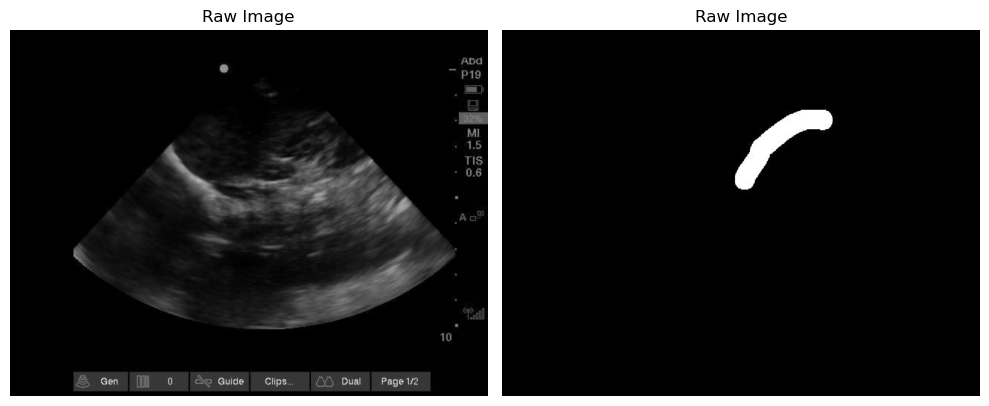

Image shape: torch.Size([1, 736, 960])
Mask shape: torch.Size([1, 736, 960])
FF label: -1


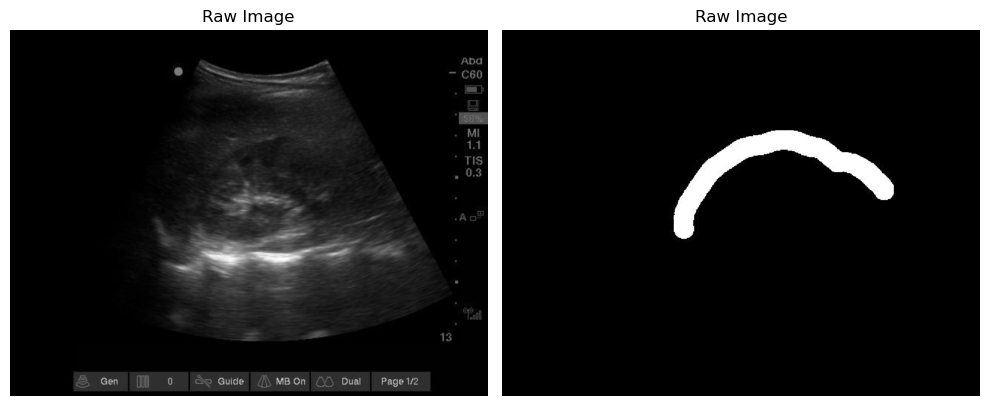

Image shape: torch.Size([1, 736, 960])
Mask shape: torch.Size([1, 736, 960])
FF label: 1


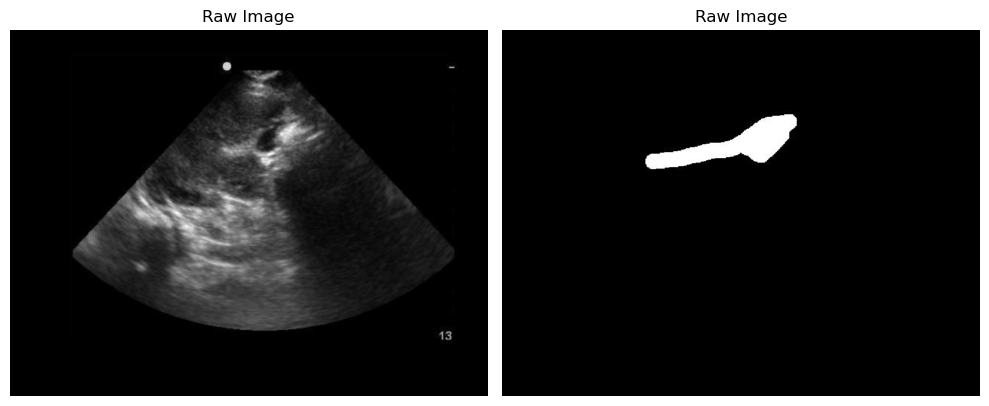

Image shape: torch.Size([1, 736, 960])
Mask shape: torch.Size([1, 736, 960])
FF label: -1


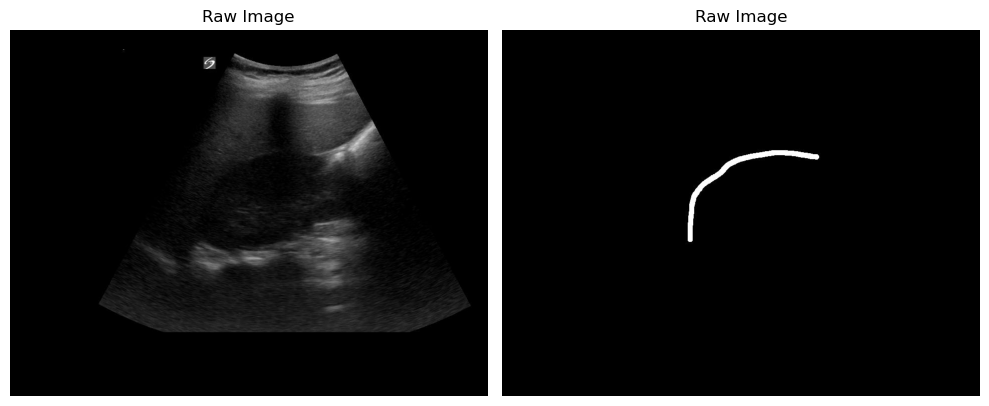

Image shape: torch.Size([1, 736, 960])
Mask shape: torch.Size([1, 736, 960])
FF label: -1


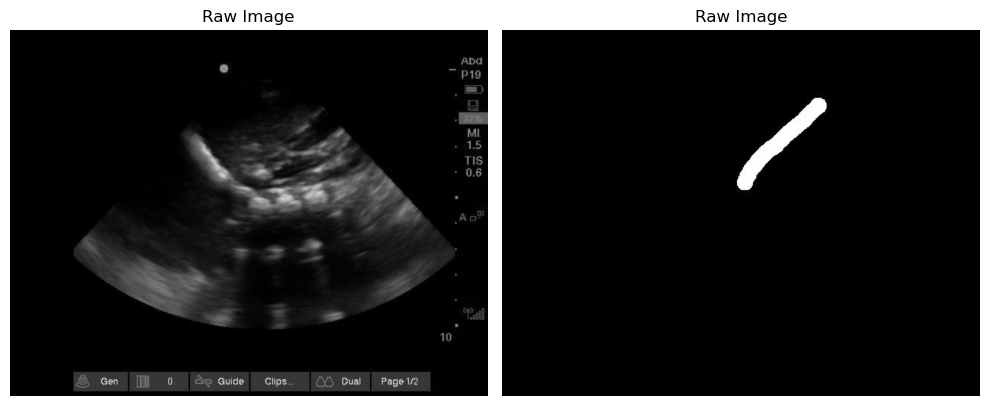

Image shape: torch.Size([1, 736, 960])
Mask shape: torch.Size([1, 736, 960])
FF label: 1


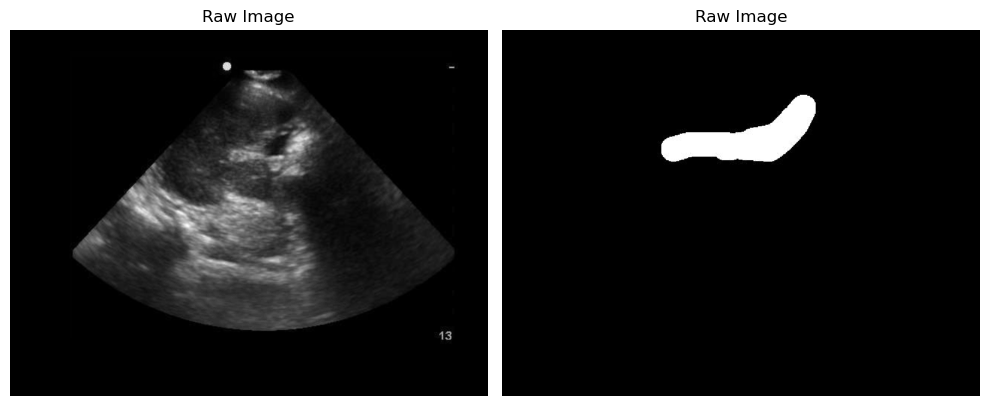

Image shape: torch.Size([1, 736, 960])
Mask shape: torch.Size([1, 736, 960])
FF label: 1


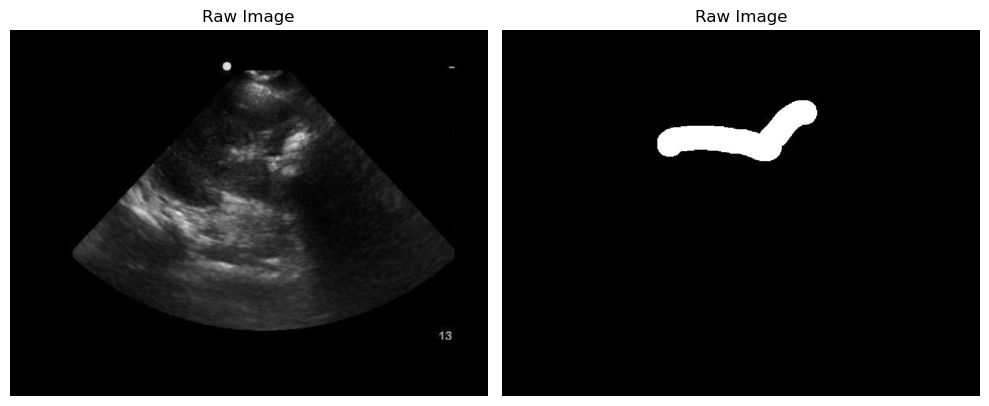

Image shape: torch.Size([1, 736, 960])
Mask shape: torch.Size([1, 736, 960])
FF label: -1


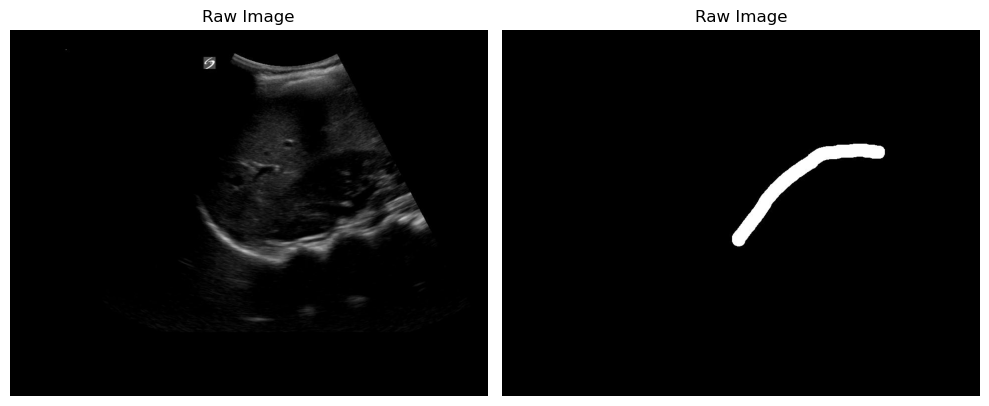

Image shape: torch.Size([1, 736, 960])
Mask shape: torch.Size([1, 736, 960])
FF label: -1


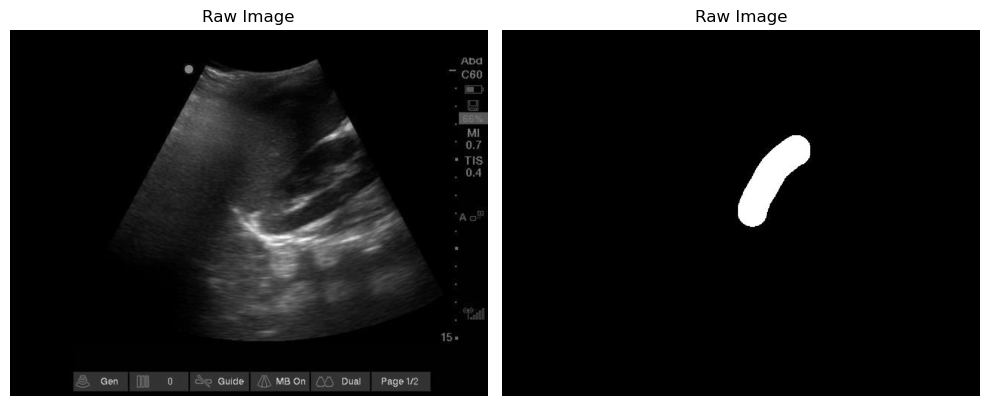

In [10]:
for idx in range(len(batch_images)):
    img = batch_images[idx]
    mask = batch_masks[idx]
    label = batch_labels[idx]

    print(f'Image shape: {img.size()}')
    print(f'Mask shape: {mask.size()}')
    print(f'FF label: {label}')

    normalized_img = (img + 1) / 2
    img = normalized_img.squeeze(0)
    mask = mask.squeeze(0)


    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Raw Image')
    ax[0].axis('off')


    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title('Raw Image')
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

What's with the weird padding?? (**fixed now**)

Image shape: torch.Size([1, 720, 960])
Mask shape: torch.Size([1, 720, 960])
FF label: 1


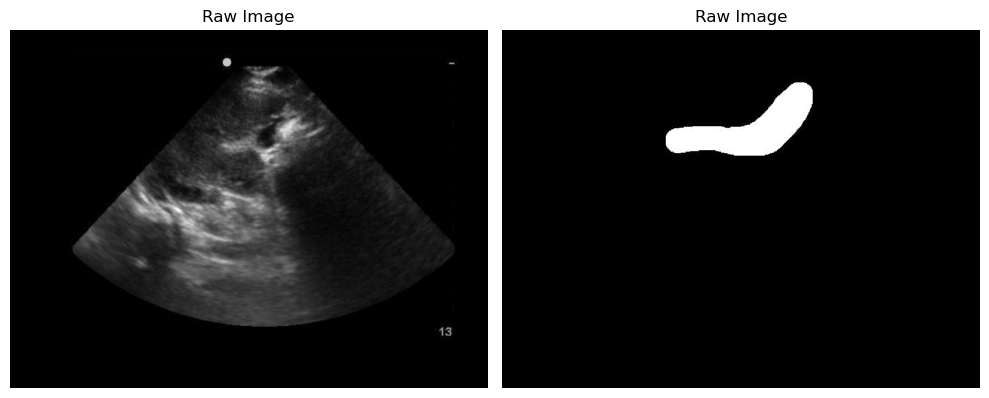

Image shape: torch.Size([1, 720, 960])
Mask shape: torch.Size([1, 720, 960])
FF label: -1


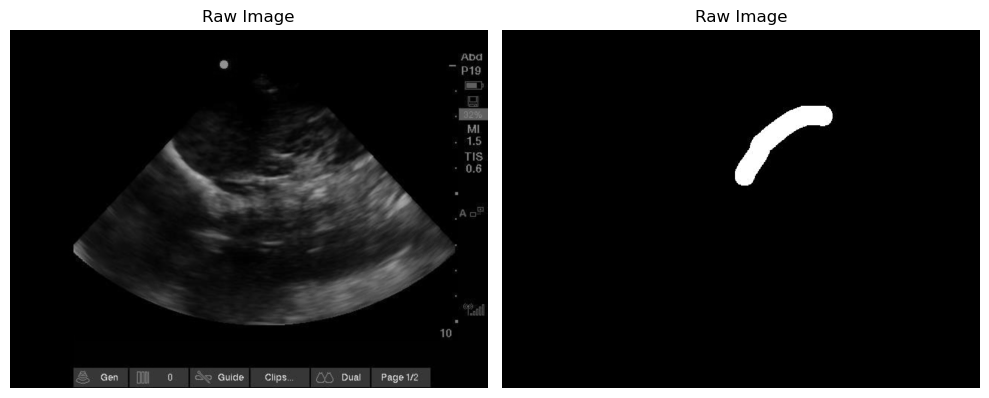

Image shape: torch.Size([1, 720, 960])
Mask shape: torch.Size([1, 720, 960])
FF label: -1


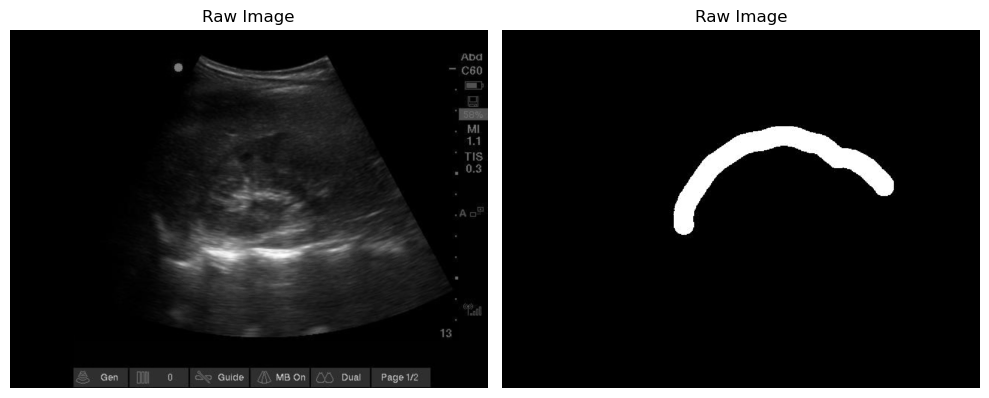

Image shape: torch.Size([1, 720, 960])
Mask shape: torch.Size([1, 720, 960])
FF label: 1


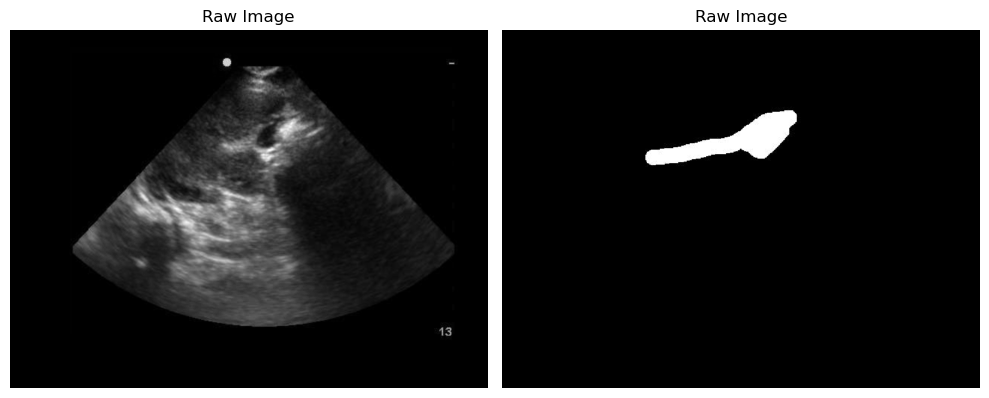

Image shape: torch.Size([1, 720, 960])
Mask shape: torch.Size([1, 720, 960])
FF label: -1


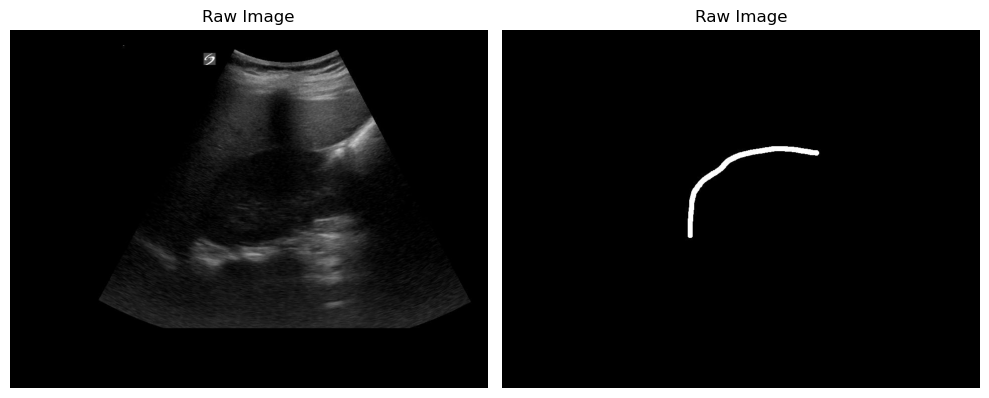

Image shape: torch.Size([1, 720, 960])
Mask shape: torch.Size([1, 720, 960])
FF label: -1


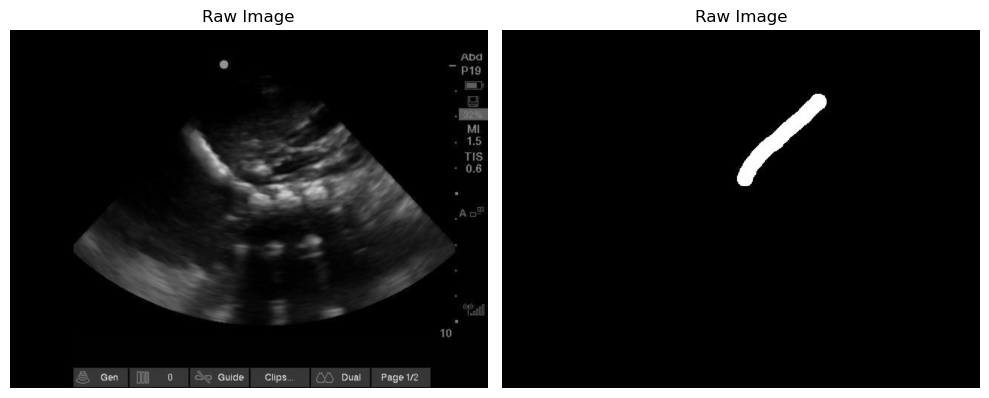

Image shape: torch.Size([1, 720, 960])
Mask shape: torch.Size([1, 720, 960])
FF label: 1


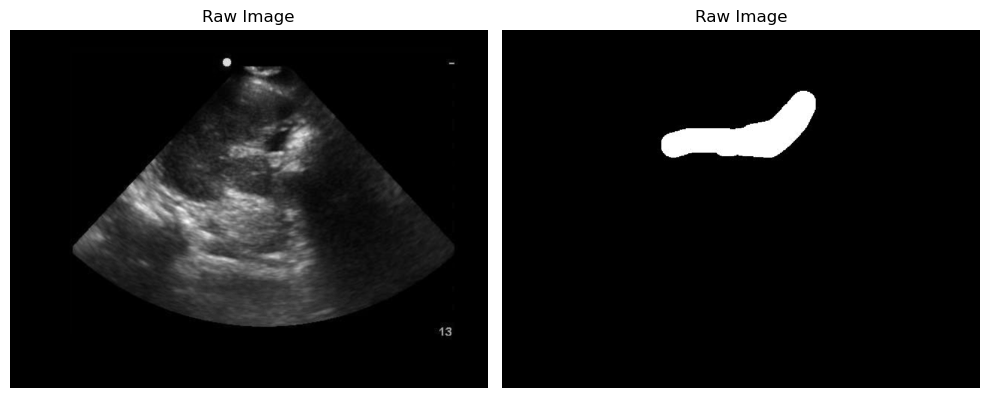

Image shape: torch.Size([1, 720, 960])
Mask shape: torch.Size([1, 720, 960])
FF label: 1


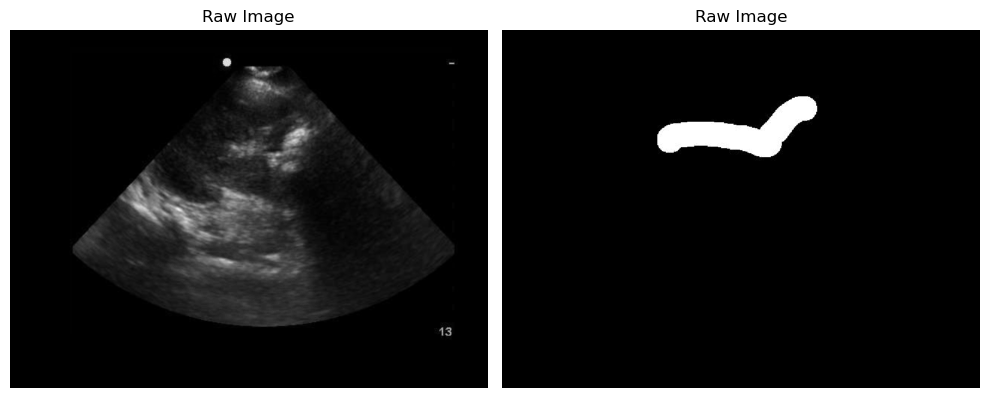

Image shape: torch.Size([1, 720, 960])
Mask shape: torch.Size([1, 720, 960])
FF label: -1


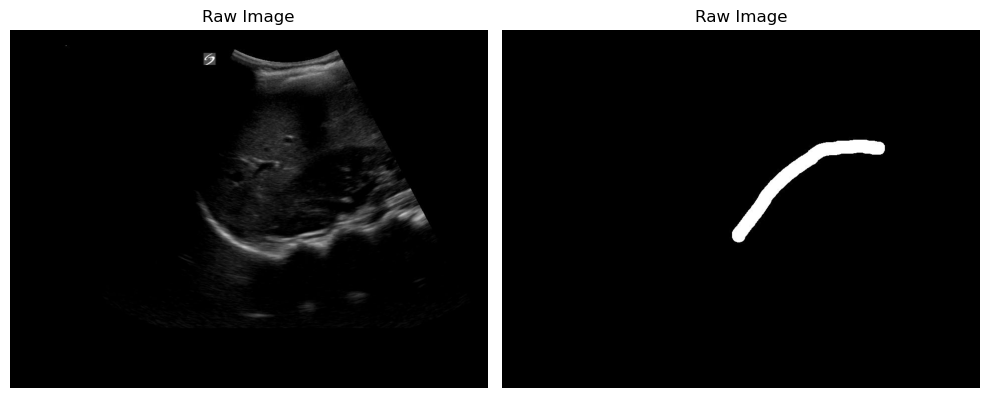

Image shape: torch.Size([1, 720, 960])
Mask shape: torch.Size([1, 720, 960])
FF label: -1


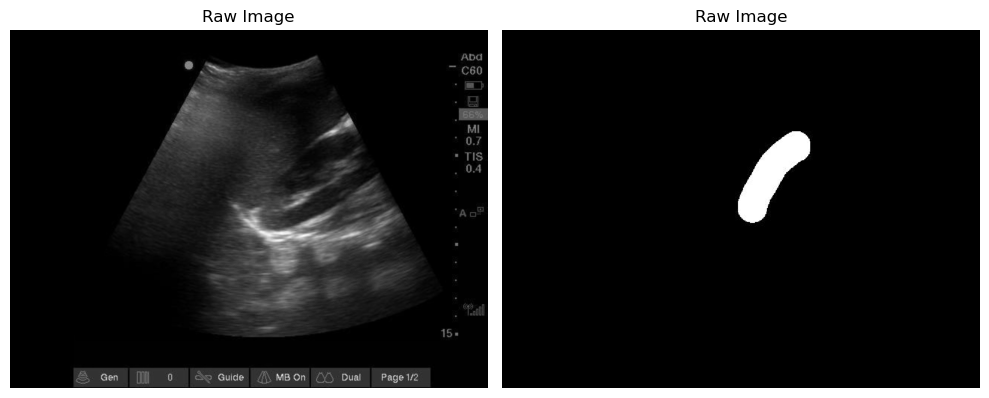

In [11]:
batch_data = torch.load('/scratch/users/austin.zane/ucsf_fast/data/labeled_fast_morison/debugging/training_loop_unpadded_data_check.pth')
batch_images = batch_data['images']
batch_masks = batch_data['masks']
batch_labels = batch_data['free_fluid_labels']

for idx in range(len(batch_images)):
    img = batch_images[idx]
    mask = batch_masks[idx]
    owo = mask
    label = batch_labels[idx]

    print(f'Image shape: {img.size()}')
    print(f'Mask shape: {mask.size()}')
    print(f'FF label: {label}')

    normalized_img = (img + 1) / 2
    img = normalized_img.squeeze(0)
    mask = mask.squeeze(0)


    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Raw Image')
    ax[0].axis('off')


    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title('Raw Image')
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

So it's happening before it gets padded in the training loop. I think it had to do with how the mask was being saved after taking from mdai. Here is an image after the fix but before rerunning all of the others. 

Jupyter notebook has a white background so I'll also visualize the negative so that a border is obvious no matter the background color.

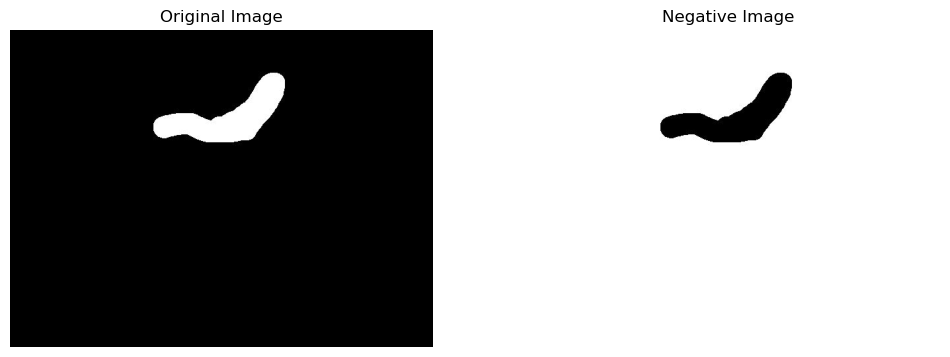

(640, 480)


In [8]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import os

debug_bdir = '/scratch/users/austin.zane/ucsf_fast/data/labeled_fast_morison/debugging'
fixed_mask = Image.open(os.path.join(debug_dir, 'PIL_saved_mask.jpg'))

# Ensure the image is in grayscale mode
if fixed_mask.mode != 'L':
    fixed_mask = fixed_mask.convert('L')

# Invert the image to get the negative
inverted_image = ImageOps.invert(fixed_mask)

# Display the original and the negative image using matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(fixed_mask, cmap='gray')
bplt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(inverted_image, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.show()

print(fixed_mask.size)

# Visualize Saved Outputs of Segmentation Model
A new feature saves predicted masks after training the segmentation model. These should just be white worms on black backgrounds. 
No binary cutoff yet so there should be some gray as well.

In [55]:
import os
import random
import torch
from PIL import Image
from matplotlib import pyplot as plt

def vis_saved_outputs(proj_name, run_name):
    output_dir = '/scratch/users/austin.zane/ucsf_fast/data/seg_outputs/'
    run_dir = output_dir = os.path.join(output_dir, proj_name, run_name)
    train_dir = os.path.join(run_dir, 'train')
    val_dir = os.path.join(run_dir, 'val')

    train_samp = random.sample(os.listdir(train_dir), 2)
    val_samp = random.sample(os.listdir(val_dir), 2)

    print(f'Training seg outputs:')
    for fname in train_samp:
        tensor_name = os.path.join(train_dir, fname)
        pred_mask_tensor = torch.load(tensor_name, map_location=torch.device('cpu'))

        # Ensure the tensor has the correct shape
        if pred_mask_tensor.dim() == 3 and pred_mask_tensor.shape[0] == 1:
            # Remove the channel dimension if it exists
            pred_mask_tensor = pred_mask_tensor.squeeze(0)
        else:
            raise ValueError("Invalid tensor shape. Expected shape: (1, height, width)")

        # Convert the tensor to a numpy array
        pred_mask_array = pred_mask_tensor.numpy()

        plt.imshow(pred_mask_array, cmap='gray')
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    print(f'Validation seg outputs:')
    for fname in val_samp:
        tensor_name = os.path.join(val_dir, fname)
        pred_mask_tensor = torch.load(tensor_name, map_location=torch.device('cpu'))

        # Ensure the tensor has the correct shape
        if pred_mask_tensor.dim() == 3 and pred_mask_tensor.shape[0] == 1:
            # Remove the channel dimension if it exists
            pred_mask_tensor = pred_mask_tensor.squeeze(0)
        else:
            raise ValueError("Invalid tensor shape. Expected shape: (1, height, width)")

        # Convert the tensor to a numpy array
        pred_mask_array = pred_mask_tensor.numpy()

        plt.imshow(pred_mask_array, cmap='gray')
        plt.axis('off')
        plt.tight_layout()
        plt.show()



Training seg outputs:


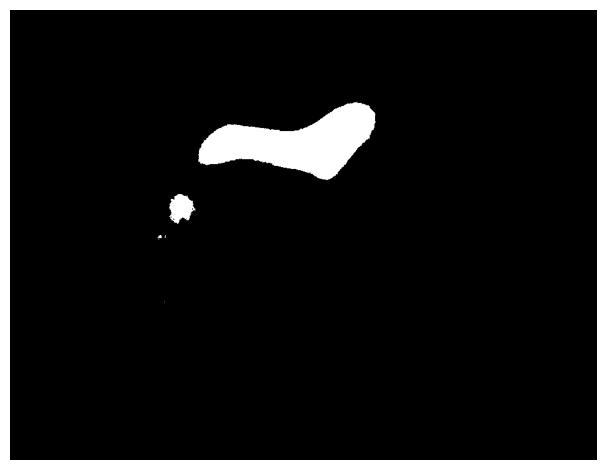

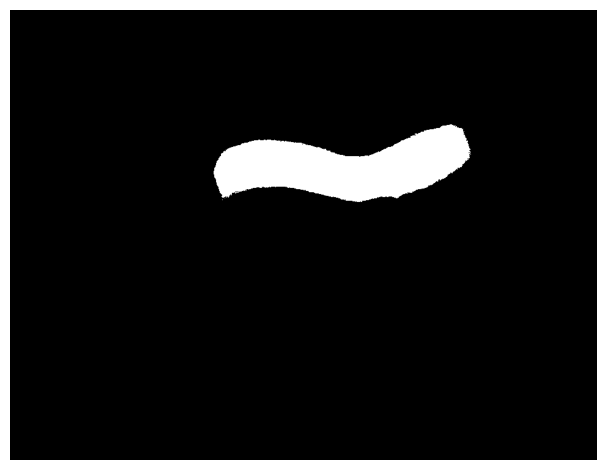

Validation seg outputs:


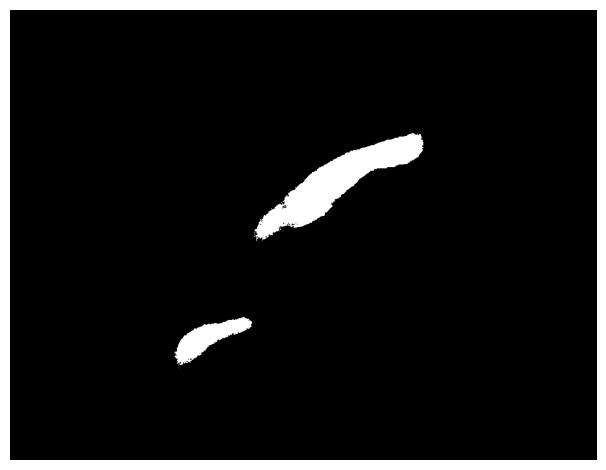

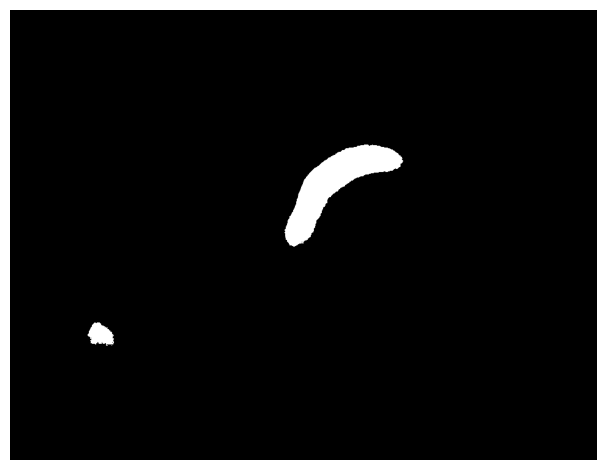

In [56]:
proj_name = 'unet_test_05_18_24'
run_name = 'hopeful-armadillo-10-zikg3bfr'
vis_saved_outputs(proj_name, run_name)

# Visualize saved images after data processing overhaul

Data is now processed when it is retrieved from MDai instead of when it is retrieved by the dataset class. This should have a very large effect on training time and will reduce the probability of errors.

They are now saved as torch tensors, so I will visualize them here by converting them to images. 

In [10]:
import os
import torch
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def visualize_preprocessed_tensors(split='train', num_vis=2):
    print(f'Visualizing {num_vis} random images and masks from the {split} split.')
    data_dir = os.path.join('/scratch/users/austin.zane/ucsf_fast/data/labeled_fast_morison', split)
    image_dir = os.path.join(data_dir, 'images')
    mask_dir = os.path.join(data_dir, 'masks')

    sel_images = random.sample(os.listdir(image_dir), num_vis)
    sel_masks = [f.replace('.pt', '_Mask.pt') for f in sel_images]
    
    for i in range(len(sel_images)):
        image_tensor = torch.load(os.path.join(image_dir, sel_images[i]))
        mask_tensor = torch.load(os.path.join(mask_dir, sel_masks[i]))

        # Ensure the tensor has the correct shape
        if image_tensor.dim() == 3 and image_tensor.shape[0] == 1:
            # Remove the channel dimension if it exists
            image_tensor = image_tensor.squeeze(0)
            mask_tensor = mask_tensor.squeeze(0)
        else:
            raise ValueError("Invalid tensor shape. Expected shape: (1, height, width)")

        # Convert the tensor to a numpy array
        image_array = image_tensor.numpy()
        mask_array = mask_tensor.numpy()

        fig, ax = plt.subplots(1, 2, figsize=(10, 5))

        ax[0].imshow(image_array, cmap='gray')
        ax[0].axis('off')

        ax[1].imshow(mask_array, cmap='gray')
        ax[1].axis('off')


        # Display the image using Matplotlib
        plt.tight_layout()
        plt.show()

Visualizing 2 random images and masks from the train split.


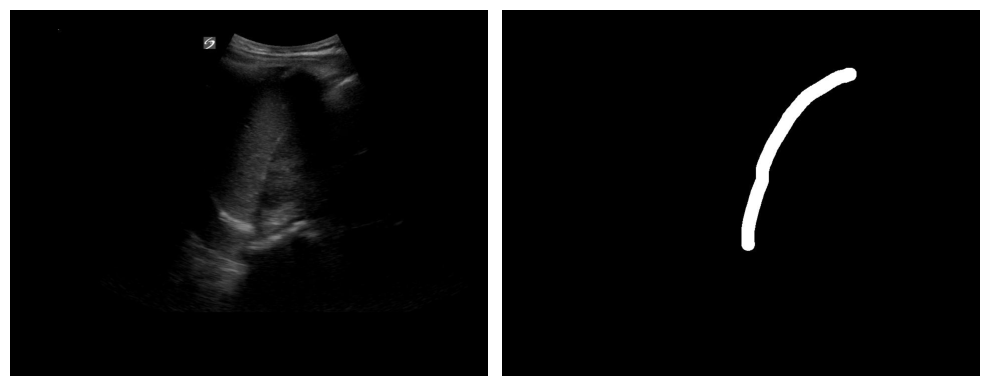

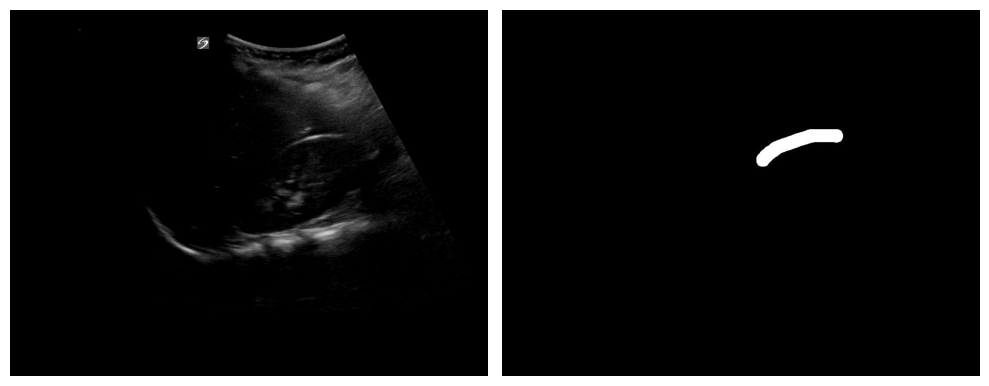

Visualizing 2 random images and masks from the val split.


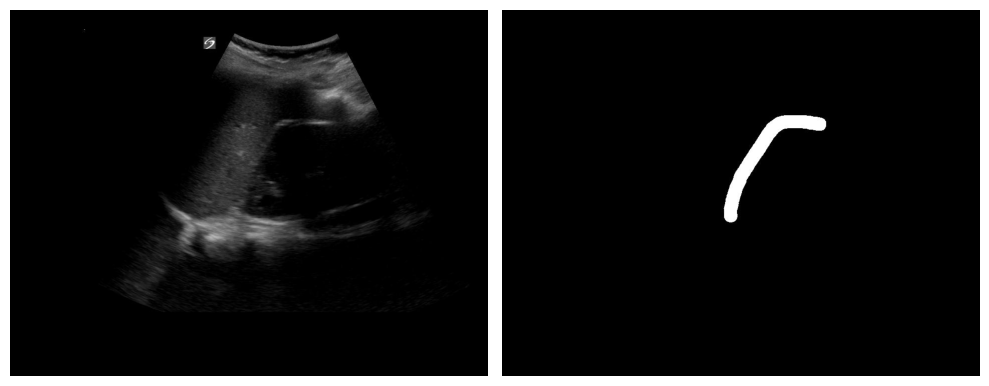

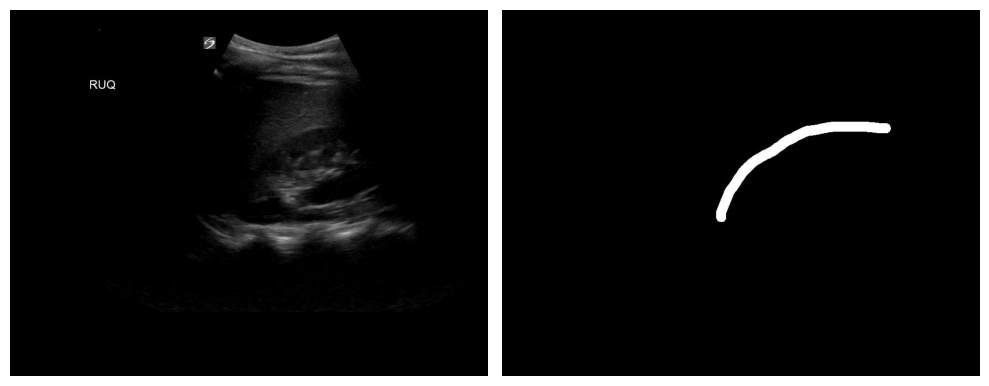

Visualizing 2 random images and masks from the test split.


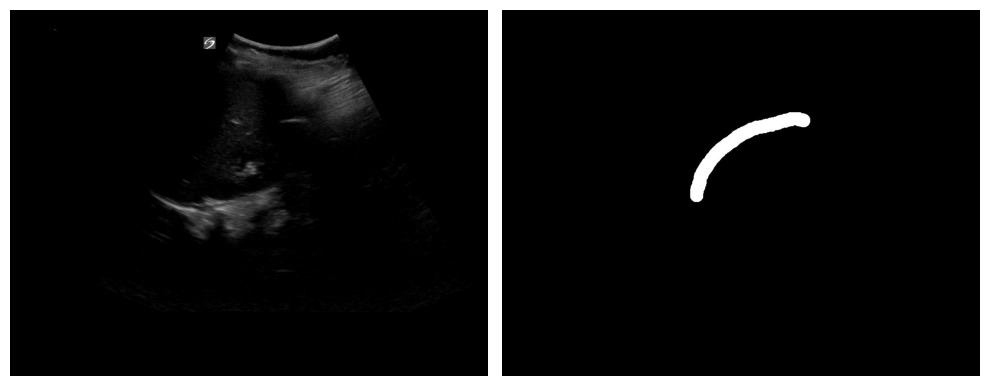

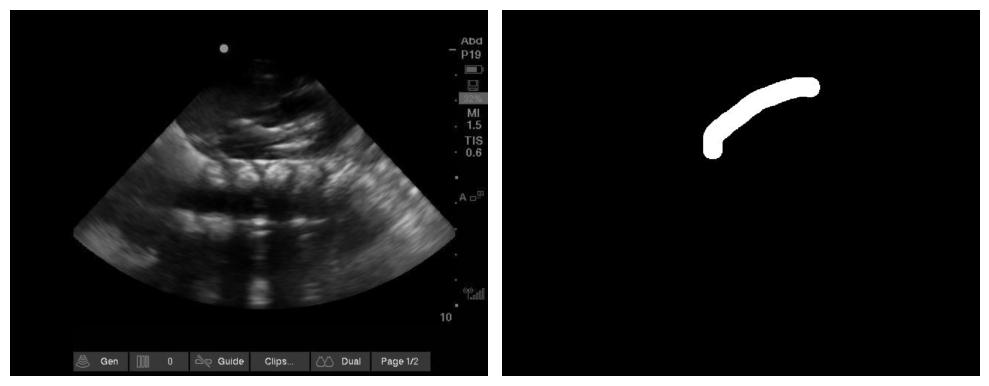

In [24]:
for split in ['train', 'val', 'test']:
    visualize_preprocessed_tensors(split, 2)

# Visualize right before the images are fed into the model